Import modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestRegressor

Model Helpliners

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

Dataset loadding and basic EDA

In [ ]:
asd = pd.read_csv("Toddler Autism dataset July 2018.csv")

In [ ]:
asd.head()

Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  Qchat-10-Score  \
0        1   0   0   0   0   0   0   1   1   0    1        28               3   
1        2   1   1   0   0   0   1   1   0   0    0        36               4   
2        3   1   0   0   0   0   0   1   1   0    1        36               4   
3        4   1   1   1   1   1   1   1   1   1    1        24              10   
4        5   1   1   0   1   1   1   1   1   1    1        20               9   

  Sex       Ethnicity Jaundice Family_mem_with_ASD Who completed the test  \
0   f  middle eastern      yes                  no          family member   
1   m  White European      yes                  no          family member   
2   m  middle eastern      yes                  no          family member   
3   m        Hispanic       no                  no          family member   
4   f  White European       no                 yes          family member   

  Class/ASD Traits   
0                No  
1               Yes  
2               Yes  
3               Yes  
4               Yes

In [ ]:
asd.describe()

Case_No           A1           A2           A3           A4  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean    527.500000     0.563567     0.448767     0.401328     0.512334   
std     304.407895     0.496178     0.497604     0.490400     0.500085   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%     264.250000     0.000000     0.000000     0.000000     0.000000   
50%     527.500000     1.000000     0.000000     0.000000     1.000000   
75%     790.750000     1.000000     1.000000     1.000000     1.000000   
max    1054.000000     1.000000     1.000000     1.000000     1.000000   

                A5           A6           A7           A8           A9  \
count  1054.000000  1054.000000  1054.000000  1054.000000  1054.000000   
mean      0.524668     0.576850     0.649905     0.459203     0.489564   
std       0.499628     0.494293     0.477226     0.498569     0.500128   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       1.000000     1.000000     1.000000     0.000000     0.000000   
75%       1.000000     1.000000     1.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               A10     Age_Mons  Qchat-10-Score  
count  1054.000000  1054.000000     1054.000000  
mean      0.586338    27.867173        5.212524  
std       0.492723     7.980354        2.907304  
min       0.000000    12.000000        0.000000  
25%       0.000000    23.000000        3.000000  
50%       1.000000    30.000000        5.000000  
75%       1.000000    36.000000        8.000000  
max       1.000000    36.000000       10.000000

In [ ]:
asd.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
asd.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [ ]:
asd.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

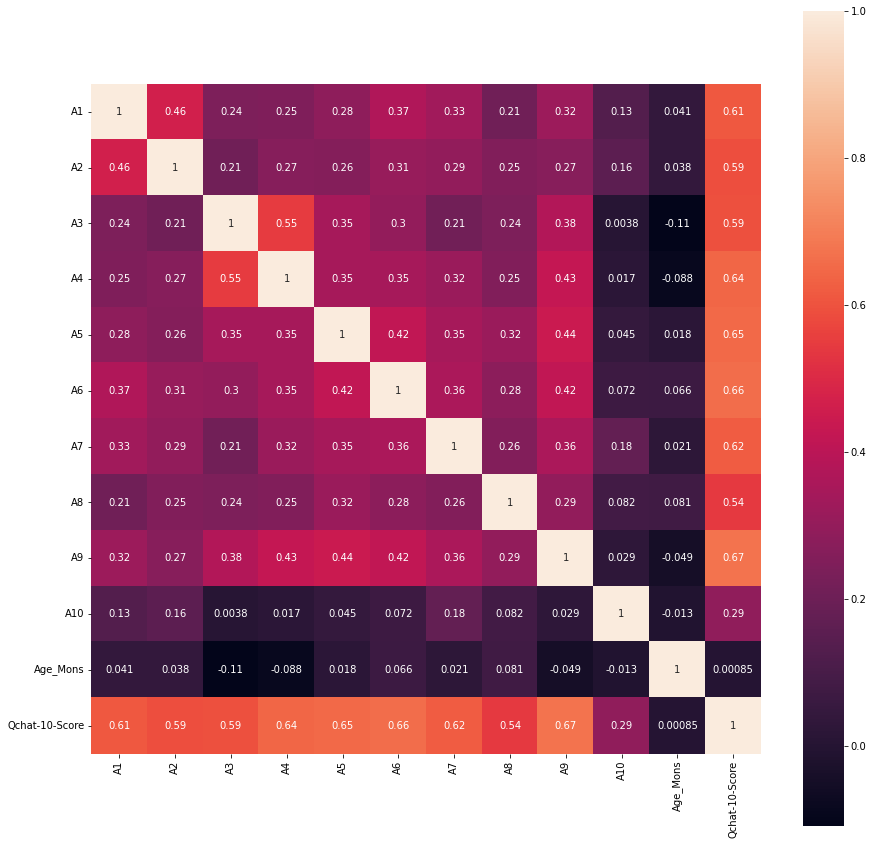

In [ ]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

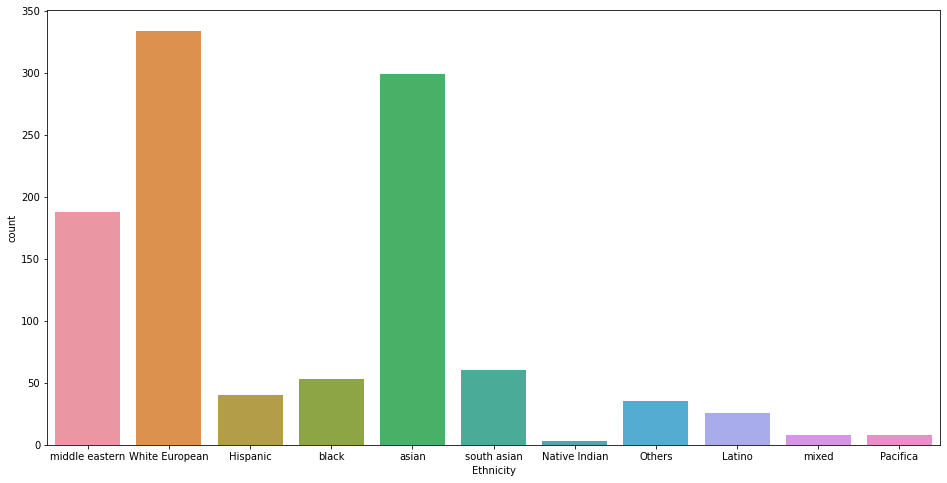

In [ ]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = asd)

In [ ]:
asd.drop('Qchat-10-Score', axis = 1, inplace = True)

In [ ]:
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [ ]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
asd.dtypes
features=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons', 'Sex', 'Ethinicity', 'Jaundice', 'Family_mem_with_ASD', 'Class/ASD Traits']

In [ ]:
X = asd.drop(['Class/ASD Traits '], axis = 1)
Y = asd['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)

In [ ]:
model=RandomForestRegressor()

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
pred = model.predict(x_test).astype(int)

In [ ]:
print(accuracy_score(y_test, pred))

0.6161137440758294


Expandable AI SHAP

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 8.0 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

SHAP feature importance

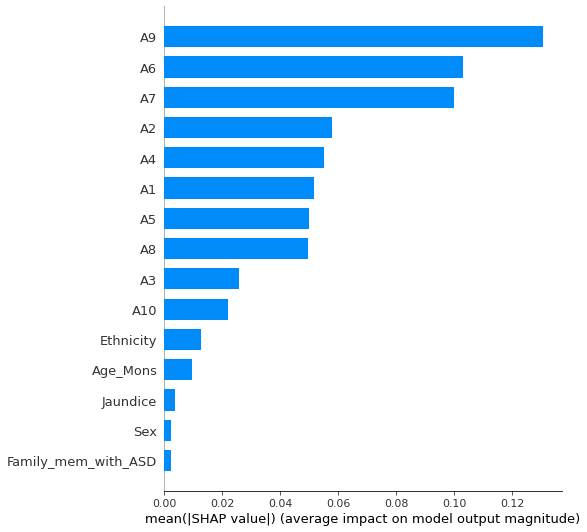

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar")

SHAP summary plot

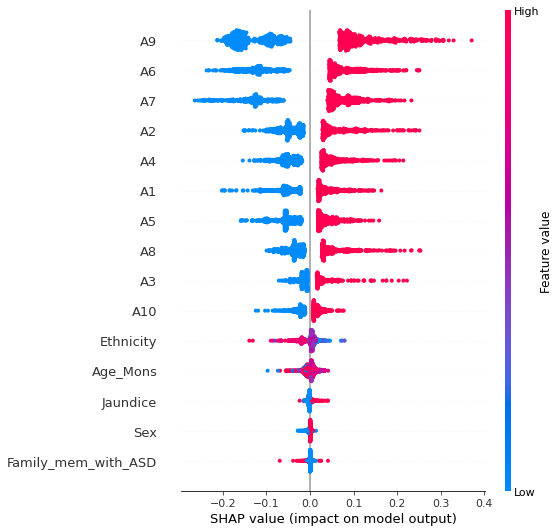

In [ ]:
shap.summary_plot(shap_values, x_train)

SHAP dependance plot

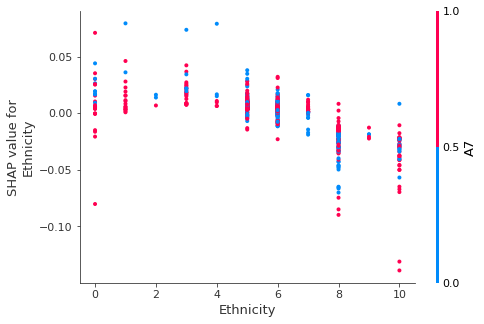

In [ ]:
shap.dependence_plot(12, shap_values, x_train)

SHAP Decision plot

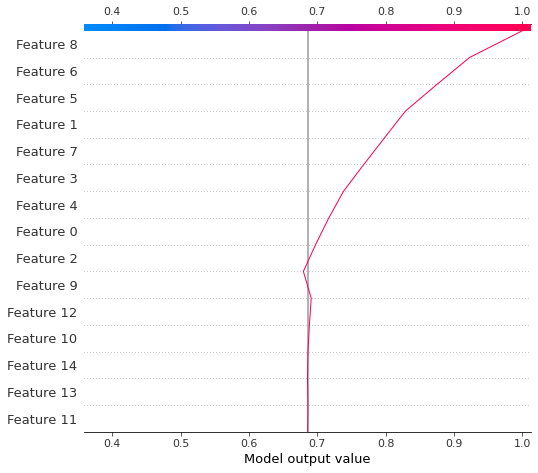

In [ ]:
shap.decision_plot(explainer.expected_value[0], shap_values[0])

LIME Expandable AI

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 275 kB 8.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283858 sha256=dbdd89f57ab8a58b2de4d155c302584b7f9285d138e73e49f1383a1d40fe7e0e
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    class_names=['0', '1'],
    mode='regression'
)

ASD positive

In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[27], 
    predict_fn=model.predict
)

exp.show_in_notebook(show_table=True)

ASD negative

In [ ]:
exp = explainer.explain_instance(
    data_row=x_test.iloc[30], 
    predict_fn=model.predict
)

exp.show_in_notebook(show_table=True)